In [2]:
pip install librosa


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename = r'/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold17061-6-0-0.wav'

In [6]:
import IPython.display as ipd
import librosa
import librosa.display

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!ls /content/drive/MyDrive/UrbanSound8K/audio/


fold1  fold10  fold2  fold3  fold4  fold5  fold6  fold7  fold8	fold9


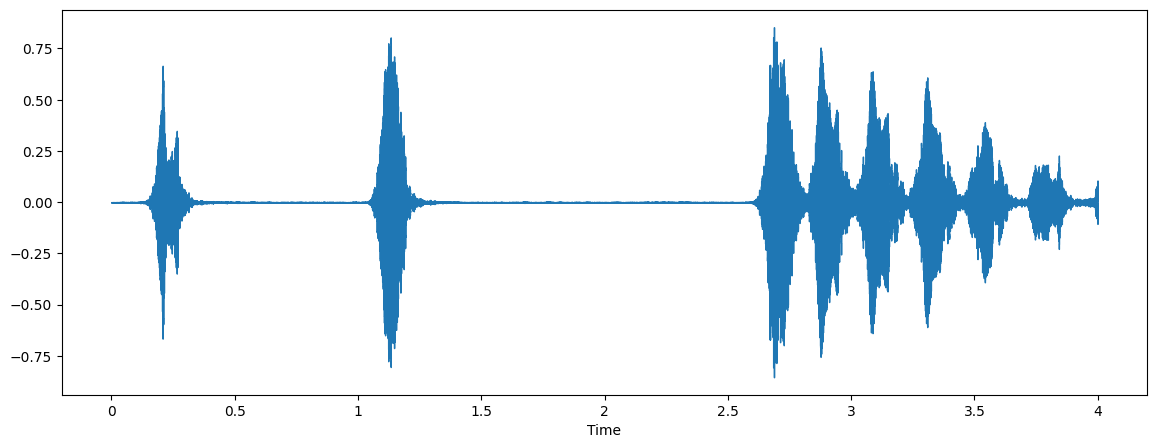

In [5]:



import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd


filename = r'/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
data, sample_rate = librosa.load(filename)


plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)


ipd.Audio(filename)
#sound


In [ ]:
sample_rate #how many times pers second sound is samples

22050

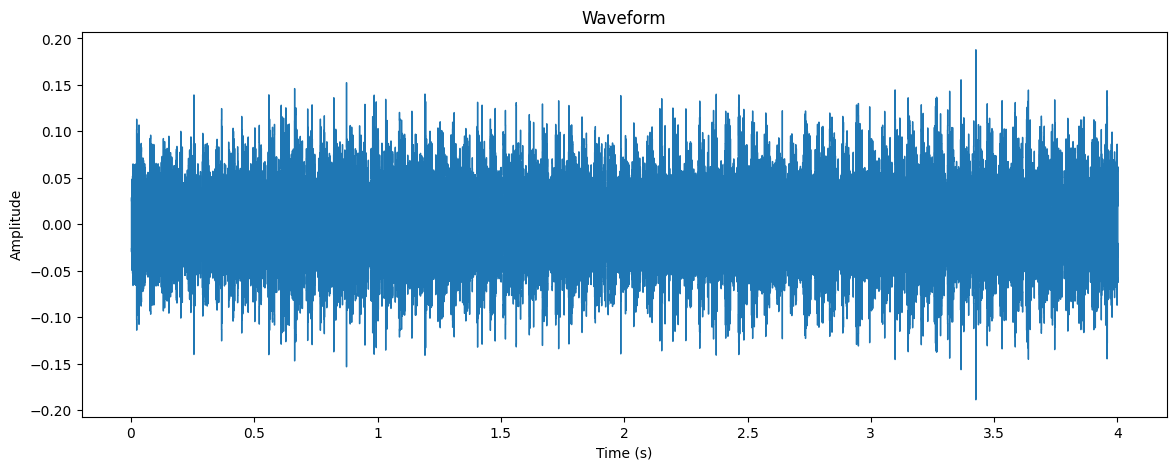

In [ ]:
# import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

filename = '/content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-1-2.wav'

# Load the audio
data, sample_rate = librosa.load(filename)

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)  # Corrected here
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the audio
ipd.Audio(filename)


In [ ]:
sample_rate

22050

In [ ]:

### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [ ]:
wave_sample_rate

48000

In [ ]:
wave_audio #in scipy wave signal values are not normalised

array([[ 18156800,  21835520],
       [ 46078976,  46719744],
       [ 61990656,  59794688],
       ...,
       [-27282176,  -6505984],
       [ -5806592,  25873408],
       [ 11007488,  39204096]], dtype=int32)

In [ ]:
 data #in librosa represent wave signal values get normalise , , librosa tries convert all signals into 1 signal  i.e mono signal

array([ 0.00929192,  0.02928763,  0.01520221, ..., -0.01573232,
       -0.02352753,  0.00342545], dtype=float32)

In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
metadata['class'].value_counts() # to check if dataset is imbalanced or not

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
jackhammer,1000
engine_idling,1000
drilling,1000
siren,929
car_horn,429


In [ ]:
#2
import librosa
audio_file_path='/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-8.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
# plt.figure(figsize=(14, 5))
# librosa.display.waveshow(data, sr=sample_rate)


# ipd.Audio(audio_file_path)
#librosa converts any audio into 1 mono channel(1D Signal)

In [ ]:
print(librosa_audio_data)

[ 0.23264292  0.3517679   0.29677212 ... -0.002873   -0.00120905
 -0.00118477]


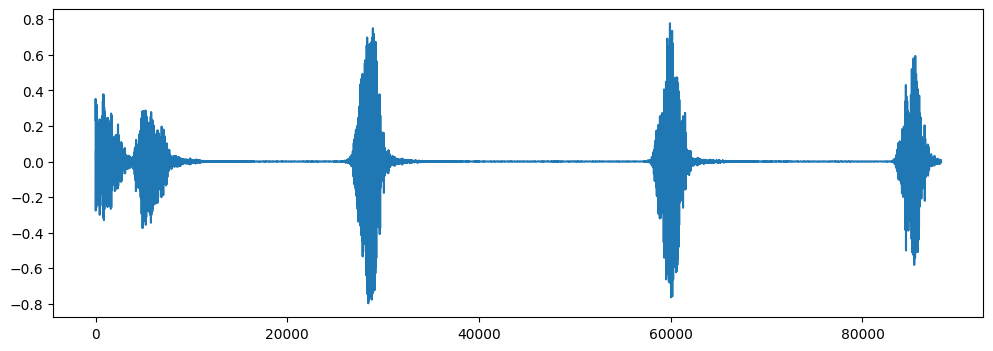

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [1]:
#2 dimensions i.e. sterio channel
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

NameError: name 'audio_file_path' is not defined

In [ ]:
wave_audio

array([10955, 10850, 10679, ...,   -42,   -31,   -30], dtype=int16)

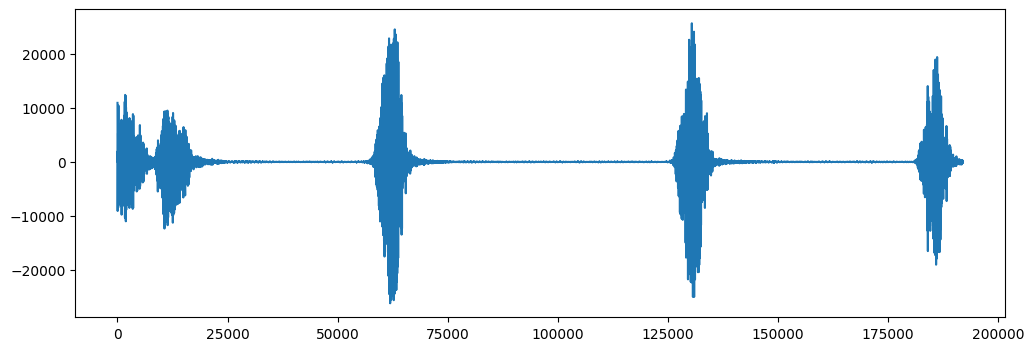

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
#take signals and create independent feature represent this audio
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=50)
print(mfccs.shape)
#n_mfc It's how many features (coefficients) you want to keep to represent each short slice (frame) of your audio.

(50, 173)


In [ ]:
mfccs
#uniquely identify that particular audio siganl

array([[-1.3384369e+02, -1.6187689e+02, -2.4668971e+02, ...,
        -2.8643549e+02, -3.3991559e+02, -3.8729968e+02],
       [ 1.2751001e+02,  1.3888113e+02,  1.2948892e+02, ...,
         1.7526721e+02,  1.4579324e+02,  1.2255610e+02],
       [-1.5061155e+01, -1.6489906e+01, -1.2738590e+01, ...,
         2.4270889e-01,  2.0795934e+00,  7.1689429e+00],
       ...,
       [ 3.9059362e-01,  3.8846717e+00,  1.8233254e+00, ...,
        -6.5135944e-01, -1.6307676e-01, -1.1610655e+00],
       [-1.4174573e+00,  5.5207229e-01, -7.9029961e+00, ...,
        -1.7759925e+00, -3.6275735e+00, -6.6611896e+00],
       [ 8.4054244e-01,  2.0561817e+00,  7.4989265e-01, ...,
        -2.4885888e+00, -1.7628814e+00, -4.3544846e+00]], dtype=float32)

In [ ]:

import pandas as pd
import os
import librosa
metadata_path = r"/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv"

audio_dataset_path=r'/content/drive/MyDrive/UrbanSound8K/audio'


metadata = pd.read_csv(metadata_path)
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:

pip install resampy

In [ ]:

import os
import librosa
import resampy
import numpy as np
from tqdm import tqdm
#tqdm is a library to monitor progress and give visual feedback

# Creating feature extractor, takes audio file and sample rate and scales features
#for mfcc features we take 2 vars audio, sample_rate
# monochannel and sterio channel
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features
#to find out scale feature we do mean

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])





3555it [24:08,  2.23it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [56:09,  2.56it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [56:10,  3.04it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [58:43,  2.48it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()
#his tells which features for which class
#creating dependent and independent feature to later covert it into dataframe

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [ ]:
#spilitting data into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65353084e-01, -2.05009365e+01, ...,
         2.85459423e+00, -1.60920465e+00,  3.52480602e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066138e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651175e+00]], dtype=float32)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
y.shape

(8732,)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_test.shape

(1747, 40)

In [ ]:
y_train.shape

(6985,)

In [ ]:
y_test.shape

(1747,)

In [ ]:
#MODEL CREATION

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
#num of classes

import numpy as np

# See how many unique labels there are
num_labels = len(np.unique(y))
print("Number of labels:", num_labels)



Number of labels: 10


In [ ]:
from tensorflow.keras.layers import Dense

# Example with 128 neurons and ReLU activation
# Dense(128, activation='relu')



In [ ]:
model=Sequential() #means layers are stacked
#first layer
model.add(Dense(100,input_shape=(40,))) #connected layer with 100 nodes and 40 input features
model.add(Activation('relu')) #relu is activation function helps for non linear relationships
model.add(Dropout(0.5)) #dropout prevents overfitting, randomly drop 50% nodes

#second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # 2nd layer learns more abstarct features

#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax')) #softmax function turns outputts into probabilities that sum to 1

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
import os
from datetime import datetime
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint



# Step 1: Encode string labels into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Convert to one-hot encoded format
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

# Step 3: Ensure model's output layer matches the number of classes
num_labels = y_train_cat.shape[1]

# Example model (you should replace this with your own architecture if needed)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels)) #1 node per class
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Step 4: Set training parameters
num_epochs = 100        #telling model go through tthe traing data 100 times
num_batch_size = 32     #model only see 32 samples once

# Step 5: Create directory to save model
os.makedirs('saved_models', exist_ok=True)

# Step 6: Setup model checkpoint (Keras 3 requires `.keras` extension)
checkpointer = ModelCheckpoint(
    filepath='saved_models/audio_classification.keras',
    verbose=1,
    save_best_only=True
)

# Step 7: Train the model
start = datetime.now()

model.fit(
    X_train, y_train_cat,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test_cat),
    callbacks=[checkpointer],
    verbose=1
)

# Step 8: Show training time
duration = datetime.now() - start
print("Training completed in time:", duration)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
198/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2026 - loss: 24.7693
Epoch 1: val_loss improved from inf to 1.97029, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2115 - loss: 23.7256 - val_accuracy: 0.5369 - val_loss: 1.9703
Epoch 2/100
206/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4294 - loss: 2.8435
Epoch 2: val_loss improved from 1.97029 to 1.31392, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4312 - loss: 2.8085 - val_accuracy: 0.5930 - val_loss: 1.3139
Epoch 3/100
212/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5013 - loss: 1.6372
Epoch 3: val_loss improved from 1.31392 to 1.14075, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5017 - loss: 1.6349 - val_accuracy: 0.6485 - val_loss: 1.1408
Epoch 4/100
215/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [ ]:
test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)

print(test_accuracy[1])

0.8683457374572754


In [ ]:
# filem="/content/drive/MyDrive/UrbanSound8K/audio/fold1/102305-6-0-0.wav"
# prediction_feature=features_extractor(filem)
# prediction_feature=prediction_feature.reshape(1, -1)
# model.predict_classes(prediction_feature)


import numpy as np

filem = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/102305-6-0-0.wav"
prediction_feature = features_extractor(filem)
prediction_feature = prediction_feature.reshape(1, -1)

# Get prediction probabilities
prediction_probabilities = model.predict(prediction_feature)

# Get predicted class index
predicted_class_index = np.argmax(prediction_probabilities, axis=1)[0]

print("Predicted class index:", predicted_class_index)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted class index: 6


In [ ]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [ ]:
prediction_feature.shape

(1, 40)

In [ ]:
X_test[1]

array([-466.17957  ,    1.0950246,  -34.01389  ,   35.33935  ,
        -14.88148  ,  -19.12843  ,   -0.5816844,  -16.130579 ,
        -21.339075 ,    7.673635 ,  -29.164494 ,  -18.950253 ,
         -2.9579995,   -8.162331 ,  -15.153101 ,   -6.6048055,
         -7.5685973,    9.340646 ,   14.4331   ,   21.934181 ,
         20.861397 ,    1.3340123,  -19.228804 ,   -4.630231 ,
         -1.0564744,    3.215267 ,   -6.984281 ,  -16.414577 ,
        -10.0286455,   13.009955 ,    0.5334608,  -23.84339  ,
        -15.267321 ,    9.245735 ,   10.367627 ,   -0.583201 ,
         -1.2624054,   17.700016 ,   13.847463 ,   -5.1862826],
      dtype=float32)

In [ ]:
# Predict
y_pred_probs = model.predict(X_test)
#argmax
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Decode class names
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

# Optional: compare with true labels
y_true_labels = label_encoder.inverse_transform(np.argmax(y_test_cat, axis=1))


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
#test new audio data

In [ ]:

import librosa
import numpy as np

# Load the audio file
filename = "/content/drive/MyDrive/UrbanSound8K/audio/fold2/100652-3-0-2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

# Print original MFCC features shape and values
print("MFCC Features Shape:", mfccs_features.shape)
print("MFCC Features:\n", mfccs_features)

# Scale (take mean across time axis)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Print scaled features
print("\nScaled MFCC Features Shape:", mfccs_scaled_features.shape)
print("Scaled MFCC Features:\n", mfccs_scaled_features)

# Reshape for model prediction
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict class using model
predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)

# Decode predicted label
prediction_class = label_encoder.inverse_transform(predicted_label)

# Print final prediction
print("\nPredicted Class:", prediction_class[0])



MFCC Features Shape: (40, 173)
MFCC Features:
 [[-3.69509644e+02 -3.42797272e+02 -3.46076630e+02 ... -3.96590210e+02
  -3.05464508e+02 -2.67667145e+02]
 [ 8.08845749e+01  8.30836029e+01  8.82270966e+01 ...  1.09308624e+02
   1.59243652e+02  1.73458221e+02]
 [-5.73599358e+01 -5.63024979e+01 -5.78108864e+01 ... -4.78462982e+01
  -9.20936584e+01 -1.11385025e+02]
 ...
 [ 2.26354659e-01  1.05587339e+00 -3.27952623e+00 ...  7.34696198e+00
   7.52891731e+00  3.98319817e+00]
 [ 2.20991898e+00  5.52222300e+00  3.61040545e+00 ...  3.13395572e+00
   4.62354469e+00  8.01734161e+00]
 [-1.88861287e+00  2.35035324e+00  4.19018364e+00 ...  1.18081820e+00
   1.88003755e+00  2.56399393e+00]]

Scaled MFCC Features Shape: (40,)
Scaled MFCC Features:
 [-3.0152646e+02  1.0444432e+02 -9.1942047e+01 -1.0935776e+01
  7.5755434e+00 -1.9452181e+01 -1.7637695e+01 -1.0321820e+00
 -6.5732141e+00  1.4074795e+01  8.4409380e+00  9.9006672e+00
  1.2636958e+00 -1.8782083e+00 -4.2019987e+00  1.0371776e-01
 -7.0117038e-01